In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../Dell/Downloads/WELFake_Dataset.csv')
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df1=df.sample(frac=1,random_state=10).reset_index(drop=True)
df1

,Unnamed: 0,title,text,label
0,48033,Trump Supporters Just DESTROYED A Black Churc...,"Just a few days before election day, Donald Tr...",1
1,46928,U.S. judge narrows travel ban in defeat for Trump,(Reuters) - President Donald Trump’s temporary...,0
2,71376,Watch This GOP Delegate CLEARLY Show He Doesn...,If you ve been watching the Republican Nationa...,1
3,47278,Jury finds all Oregon standoff defendants not ...,Oregon Live – by Maxine Bernstein \nA federal ...,1
4,22561,Pentagon Unit Considered Setting Up a Secret O...,WASHINGTON — As the Central Intelligence Ag...,0
...,...,...,...,...
72129,17904,And Now the Work Begins,"Today, in the light of the morning, what do we...",1
72130,37597,Mexico urges respect from U.S. for 2018 presid...,(Reuters) - U.S. officials should be respectfu...,0
72131,10201,"May, Trump agree Russia should break ties with...",LONDON (Reuters) - British Prime Minister Ther...,0
72132,9372,Revelation Unleashed: Unlocking The Mysteries ...,Revelation Unleashed: Unlocking The Mysterie...,1


In [4]:
df1=df1.dropna().reset_index()

In [5]:
df1=df1.head(10000)

<AxesSubplot:xlabel='label', ylabel='count'>

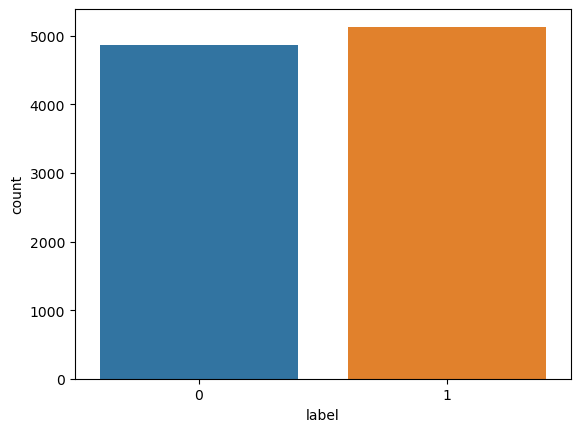

In [6]:
sns.countplot(x='label',data=df1)

In [7]:
df1['original']=df1['title']+' '+df1['text']
df1

,index,Unnamed: 0,title,text,label,original
0,0,48033,Trump Supporters Just DESTROYED A Black Churc...,"Just a few days before election day, Donald Tr...",1,Trump Supporters Just DESTROYED A Black Churc...
1,1,46928,U.S. judge narrows travel ban in defeat for Trump,(Reuters) - President Donald Trump’s temporary...,0,U.S. judge narrows travel ban in defeat for Tr...
2,2,71376,Watch This GOP Delegate CLEARLY Show He Doesn...,If you ve been watching the Republican Nationa...,1,Watch This GOP Delegate CLEARLY Show He Doesn...
3,3,47278,Jury finds all Oregon standoff defendants not ...,Oregon Live – by Maxine Bernstein \nA federal ...,1,Jury finds all Oregon standoff defendants not ...
4,4,22561,Pentagon Unit Considered Setting Up a Secret O...,WASHINGTON — As the Central Intelligence Ag...,0,Pentagon Unit Considered Setting Up a Secret O...
...,...,...,...,...,...,...
9995,10057,23302,WOW: Duck Dynasty Star Phil Robertson Offers ...,No one can accuse Duck Dynasty star Phil Rober...,1,WOW: Duck Dynasty Star Phil Robertson Offers ...
9996,10058,37428,$110K STOLEN FROM ‘At Risk Kids’ Fund By DC Ci...,Aren t the kids already suffering enough by be...,1,$110K STOLEN FROM ‘At Risk Kids’ Fund By DC Ci...
9997,10059,65001,"William Weld: Never Mind Libertarianism, He's ...",Boston magazine has a long take on William Wel...,0,"William Weld: Never Mind Libertarianism, He's ..."
9998,10060,62651,Environment 'Has Never Been A Partisan Issue' ...,WASHINGTON -- Before joining the Obama adminis...,0,Environment 'Has Never Been A Partisan Issue' ...


In [8]:
df1.isnull().sum()

index         0
Unnamed: 0    0
title         0
text          0
label         0
original      0
dtype: int64

In [9]:
df1['no_of_words']=df1['original'].apply(lambda x : len(x.split()))


In [10]:
df1['no_of_words'].max()

20904

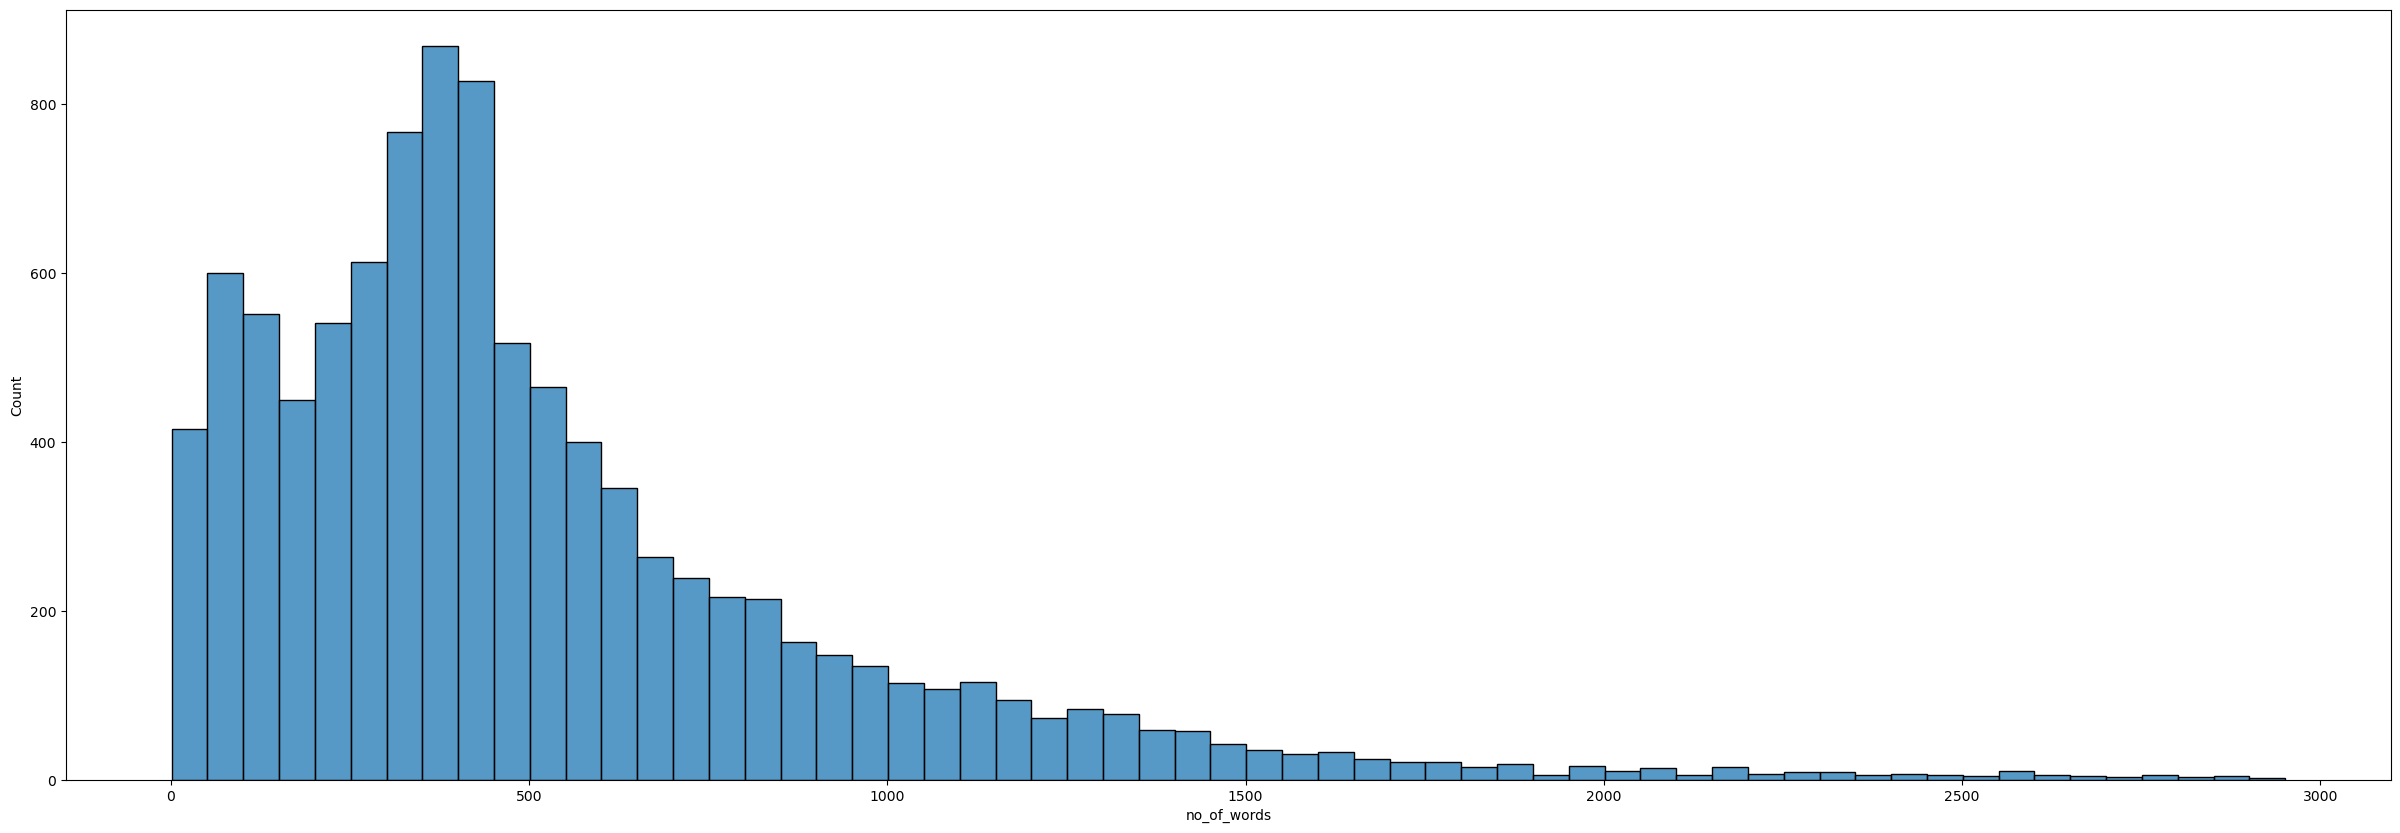

In [11]:
plt.figure(figsize=(30,10))
sns.histplot(x=df1['no_of_words'],bins=range(1,3000,50))
plt.show()

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

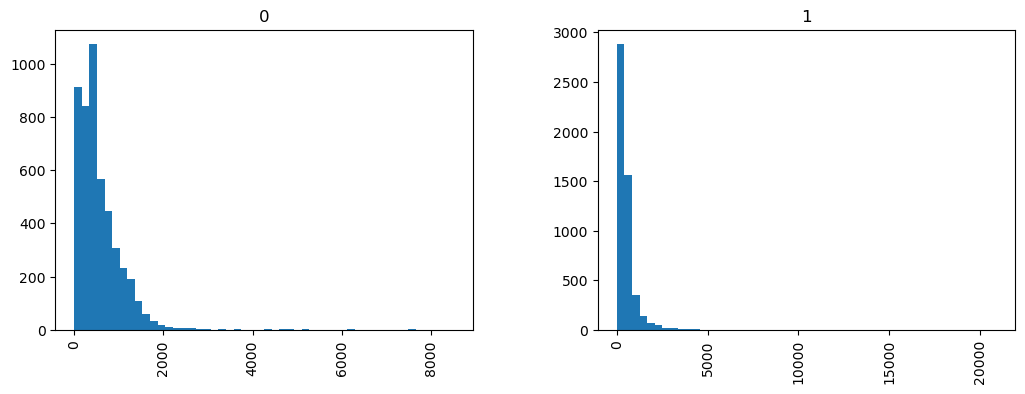

In [12]:
df1.hist(column='no_of_words', by='label', bins=50,figsize=(12,4))

In [13]:
# X=df1['original']
y=df1['label']

In [14]:
# X=X.reset_index()

In [104]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string

In [105]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [106]:
df1['original']=df1['original'].apply(wordopt)

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [137]:
def output_label(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Real News"
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = tfidf.transform(new_x_test)
    pred_LR = PAC_model.predict(new_xv_test)


    return f"\n\nLR Prediction: {output_label(pred_LR[0])} "

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

In [119]:
 X_train, X_test, y_train, y_test = train_test_split( df1['original'], y, test_size=0.30, random_state=42)

In [120]:
tfidf=TfidfVectorizer()
xv_train=tfidf.fit_transform(X_train)
xv_test=tfidf.transform(X_test)

In [121]:
PAC_model=PassiveAggressiveClassifier()
PAC_model.fit(xv_train,y_train)

PassiveAggressiveClassifier()

In [122]:
prediction=PAC_model.predict(xv_test)

In [123]:
prediction

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [124]:
print(confusion_matrix(y_test,prediction))
print(classification_report)

[[1352  106]
 [  89 1453]]
<function classification_report at 0x000001F51ACC1940>


Text(50.722222222222214, 0.5, 'Actual values')

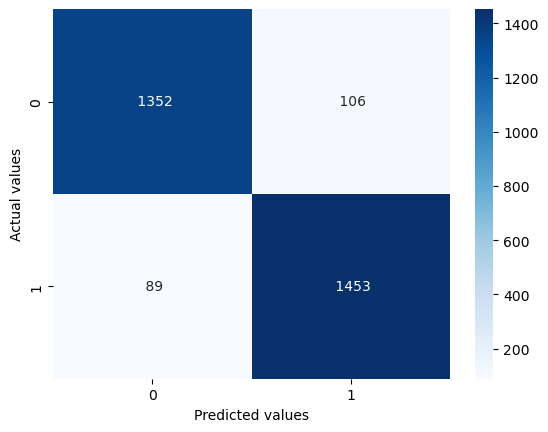

In [125]:
sns.heatmap(confusion_matrix(y_test,prediction),fmt=' ',annot=True,cmap='Blues')
plt.xlabel('Predicted values',loc='center')
plt.ylabel('Actual values')

In [126]:
print(accuracy_score(y_test,prediction)*100)

93.5


# Logistic Regression

In [32]:
# from sklearn.linear_model import LogisticRegression
# LR_model=LogisticRegression(max_iter=500)
# LR_model.fit(X_train,y_train)
# LR_prediction=LR_model.predict(X_test)
# accuracy_score(y_test,LR_prediction)

0.9233333333333333

# MultinomialNB

In [33]:
# from sklearn.naive_bayes import MultinomialNB
# NB_model=MultinomialNB(alpha=0.5)
# NB_model.fit(X_train,y_train)
# NB_prediction=NB_model.predict(X_test)
# accuracy_score(y_test,NB_prediction)

0.8716666666666667

In [ ]:
# import pickle
# with open('Fake_model.pickle','wb') as f:
#     pickle.dump(PAC_model,f)

In [ ]:
# import nltk
# nltk.download('')

In [ ]:
# from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# sia=SentimentIntensityAnalyzer()

In [ ]:
# sia.POlarity_scores("")

In [ ]:
# with open('Fake_model.pickle','rb') as f:
#     p_model=pickle.load(f)

In [139]:
news=str(input())
manual_testing(news)

Taj Mahal in Paris


'\n\nLR Prediction: Real News '

In [36]:
PAC_model.predict()

array([1], dtype=int64)